# Parte B - Analise e Descricao das Variaveis

Inicializaçao e seleção, dentre os dados brutos, os dado de interesse para o objetivo do trabalho

In [195]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import plotly.graph_objects as go
import plotly.express as px


In [88]:
PATH = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(__name__))), "data/2025MAE121dados.xlsx")
dados_brutos = pd.read_excel(PATH, sheet_name="dados")
dados_brutos = dados_brutos[['Ident', 'Altura', 'Peso', 'Alimentação', 'Tempo_sono', 'Tempo_tela', "Gênero"]]
dados_brutos.set_index('Ident', inplace=True)
dados_brutos.info()
dados = pd.DataFrame([], index=dados_brutos.index)


<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1 to 118
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Altura       118 non-null    int64  
 1   Peso         118 non-null    float64
 2   Alimentação  118 non-null    object 
 3   Tempo_sono   118 non-null    float64
 4   Tempo_tela   118 non-null    float64
 5   Gênero       118 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 6.5+ KB


## Variaveis referentes ao comportamento do aluno ("Variaveis "Independentes")

### Tempo de sono
Tratamento: Algumas entradas apresentados hora fracionada. Os dados foram tratados, de modo a arrendondar para a hora inteira mais proxima.

In [92]:
dados['Tempo_sono'] = dados_brutos['Tempo_sono'].round(0).astype(int)
freq_tempo_sono = dados['Tempo_sono'].value_counts().sort_index()
freq_tempo_sono.to_frame()

,count
Tempo_sono,
4,1
5,6
6,34
7,39
8,30
9,8


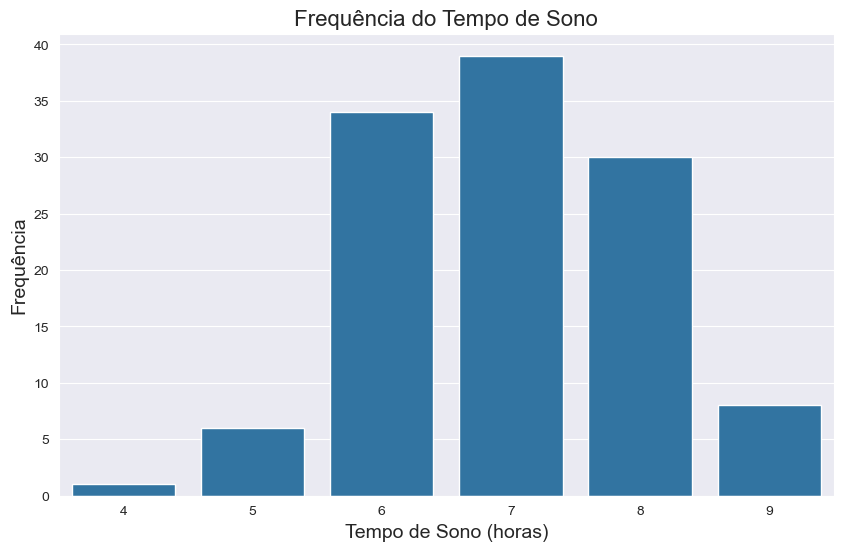

In [94]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(x=freq_tempo_sono.index, y=freq_tempo_sono.values)

plt.title('Frequência do Tempo de Sono', fontsize=16)
plt.xlabel('Tempo de Sono (horas)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()

### Alimentação


@Leandro Fernandes: adicionei handler para variavel categorica ordinal sempre quando possivel caso seja util para tua analise

In [97]:
dados["Alimentação"] = dados_brutos["Alimentação"].copy().astype("category")
ALIMENTORDER = ['Nada saudável', 'Pouco saudável', 'Saudável', 'Razoavelmente saudável','Muito saudável']
dados["Alimentação"] = dados["Alimentação"].cat.reorder_categories(ALIMENTORDER, ordered=True)

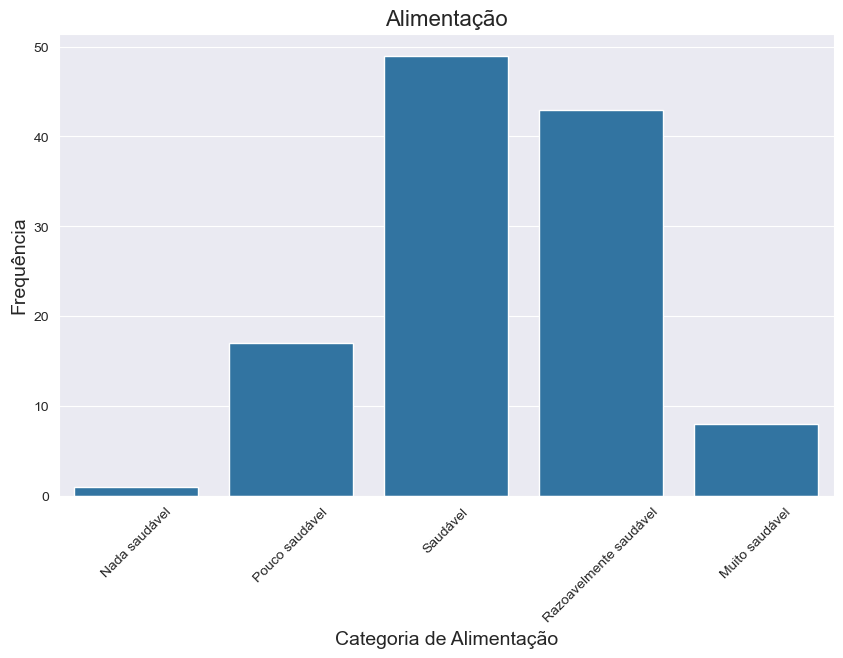

In [99]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Contar a frequência de cada categoria na variável "Alimentação"
freq_alimentacao = dados['Alimentação'].value_counts().reindex(ALIMENTORDER)

# Criar o gráfico de colunas
sns.barplot(x=freq_alimentacao.index, y=freq_alimentacao.values, order=ALIMENTORDER)

# Adicionar título e rótulos
plt.title('Alimentação', fontsize=16)
plt.xlabel('Categoria de Alimentação', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Tempo de Tela

Tratament: Alguns dados foram entrados com hora fracionada. Os dados foram tratados, de modo a arrendondar para a hora inteira mais proxima.

In [102]:
dados['Tempo_tela'] = dados_brutos['Tempo_tela'].round(0).astype(int)
dados['Tempo_tela'].describe()


count    118.000000
mean       6.550847
std        3.214809
min        0.000000
25%        4.000000
50%        6.000000
75%        8.750000
max       17.000000
Name: Tempo_tela, dtype: float64

In [104]:
# Definir os intervalos de 2 horas, ajustando o último bin para incluir 14-16 horas
bins_tempo_tela = list(range(0, 15, 2)) +[18]
tab_freq_tempo_tela = pd.cut(dados['Tempo_tela'], bins=bins_tempo_tela, right=False)
# Contar a frequência e calcular a densidade
freq_tempo_tela = tab_freq_tempo_tela.value_counts().sort_index()
densidade_tempo_tela = freq_tempo_tela / freq_tempo_tela.sum()
densidade_tempo_tela.to_frame("densidade_tempo_tela")

,densidade_tempo_tela
Tempo_tela,
"[0, 2)",0.025424
"[2, 4)",0.144068
"[4, 6)",0.228814
"[6, 8)",0.245763
"[8, 10)",0.144068
"[10, 12)",0.135593
"[12, 14)",0.059322
"[14, 18)",0.016949


@ leandro, note que aqui usei a frequencia no eixo y ao inves da frequencia relativa porque o ultimo intervalo é maior que os demais. Achoq que é isso que o prof. fala no livro. Se for, vale mencionar isso para dizer como este livro de statistica é muito bom.

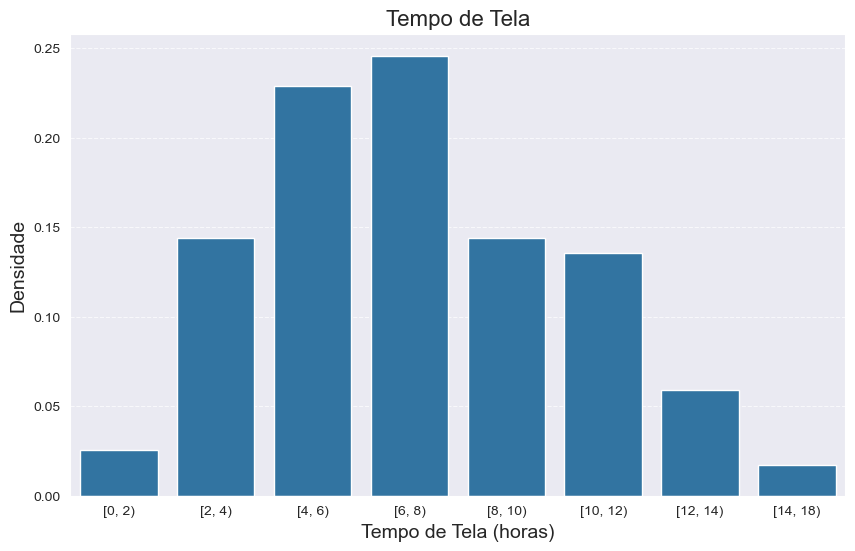

In [107]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Criar o gráfico de colunas
sns.barplot(x=densidade_tempo_tela.index.astype(str), y=densidade_tempo_tela.values)
# sns.barplot(x=densidade_tempo_tela.index.astype(str), y=densidade_tempo_tela.values)


# Adicionar título e rótulos
plt.title('Tempo de Tela', fontsize=16)
plt.xlabel('Tempo de Tela (horas)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xticks(ticks=range(len(bins_tempo_tela) - 1), labels=[f"{i}" for i in bins_tempo_tela[:-1]], rotation=0)


In [109]:
# Criar tabela de frequência para as faixas de 2 horas
tabela_frequencia_tempo_tela = freq_tempo_tela.to_frame(name='Frequência')
tabela_frequencia_tempo_tela.index.name = 'Faixa de Tempo de Tela'
tabela_frequencia_tempo_tela.reset_index(inplace=True)
tabela_frequencia_tempo_tela

,Faixa de Tempo de Tela,Frequência
0,"[0, 2)",3
1,"[2, 4)",17
2,"[4, 6)",27
3,"[6, 8)",29
4,"[8, 10)",17
5,"[10, 12)",16
6,"[12, 14)",7
7,"[14, 18)",2


### Sexo

Tratamento: optei por agrupar "outro" com "prefiro na dizer" dado que sao poucos os casos e nao vejo possvel tirar nuhuma conclusao relevadncom com apenas 2 data points em cada caso.

In [112]:
dados['Sexo'] = dados_brutos['Gênero'].copy()
dados.loc[dados["Sexo"].isin(["Outro", "Prefiro não dizer"]), "Sexo"] = "Outro/Prefiro não dizer"
tab_freq_sexo = dados['Sexo'].value_counts()
tab_freq_sexo

Sexo
Masculino                  93
Feminino                   21
Outro/Prefiro não dizer     4
Name: count, dtype: int64

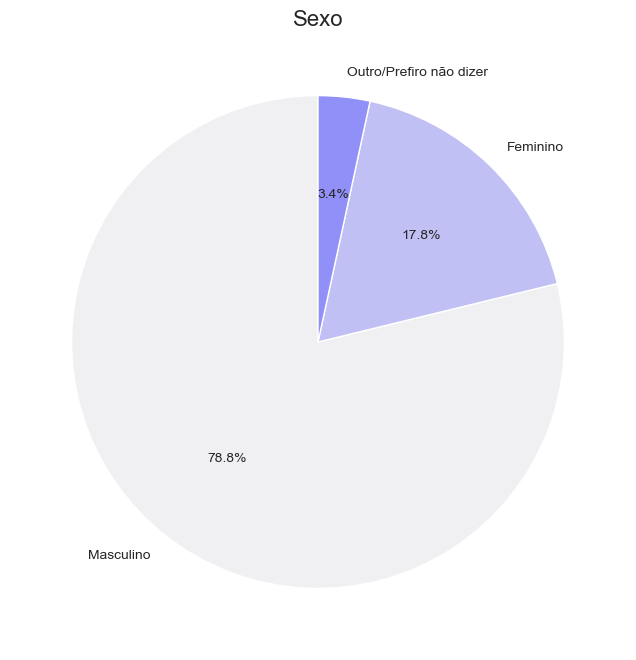

In [114]:
# Criar um gráfico de pizza para os dados de "Sexo"
plt.figure(figsize=(8, 8))
plt.pie(
    tab_freq_sexo.values,
    labels=tab_freq_sexo.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("light:b"),
)
plt.title('Sexo', fontsize=16)
# Exibir o gráfico
plt.show()

## Variaveis para composicao da métrica IMC ("variavel dependentes")

### Altura
Nenhum tratamento do dado foi necessario

In [118]:
# Tratamento (nenhum necessario)
dados['Altura'] =dados_brutos['Altura']
dados['Altura'].describe()

count    118.000000
mean     173.635593
std        8.541168
min      150.000000
25%      170.000000
50%      173.000000
75%      180.000000
max      196.000000
Name: Altura, dtype: float64

In [120]:
# Criar os intervalos de 10 cm
bins = range(dados['Altura'].min() // 10 * 10, dados['Altura'].max() // 10 * 10 + 10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
tab_freq_altura = pd.cut(dados['Altura'], bins=bins, labels=labels, right=False)
tab_freq_altura = tab_freq_altura.value_counts().sort_index()
tab_freq_altura.to_frame("Frequência")

,Frequência
Altura,
150-159,5
160-169,21
170-179,61
180-189,26


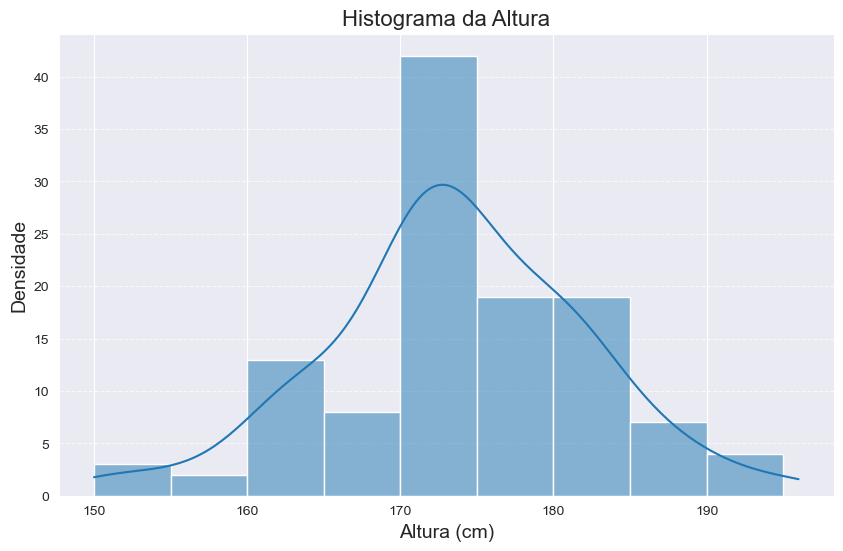

In [122]:
# Create a histogram with nice round bins
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(dados['Altura'], bins=range(150, 200, 5), kde=True)

# Add labels and title
plt.title('Histograma da Altura', fontsize=16)
plt.xlabel('Altura (cm)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Peso
Tratamento: Alguns dados na entrada haviam sido passados como valor decimal. Esses valores foram truncados para o inteiro mais proximo, resultando em todos os dados sendo inteiros

In [125]:
dados['Peso'] = dados_brutos['Peso'].round(0)
dados['Peso'].describe()

count    118.000000
mean      71.440678
std       14.977215
min       42.000000
25%       60.000000
50%       69.500000
75%       80.000000
max      120.000000
Name: Peso, dtype: float64

In [127]:
# Criar os intervalos de 10 kg
bins_peso = range(int(dados['Peso'].min()) // 10 * 10, int(dados['Peso'].max()) // 10 * 10 + 10, 10)
labels_peso = [f"{i}-{i+9}" for i in bins_peso[:-1]]

# Agrupar os dados em faixas de 10 kg e contar as ocorrências
tab_freq_peso = pd.cut(dados['Peso'], bins=bins_peso, labels=labels_peso, right=False)
tab_freq_peso = tab_freq_peso.value_counts().sort_index()
tab_freq_peso.to_frame("Frequência")

,Frequência
Peso,
40-49,3
50-59,21
60-69,35
70-79,28
80-89,15
90-99,10
100-109,4
110-119,1


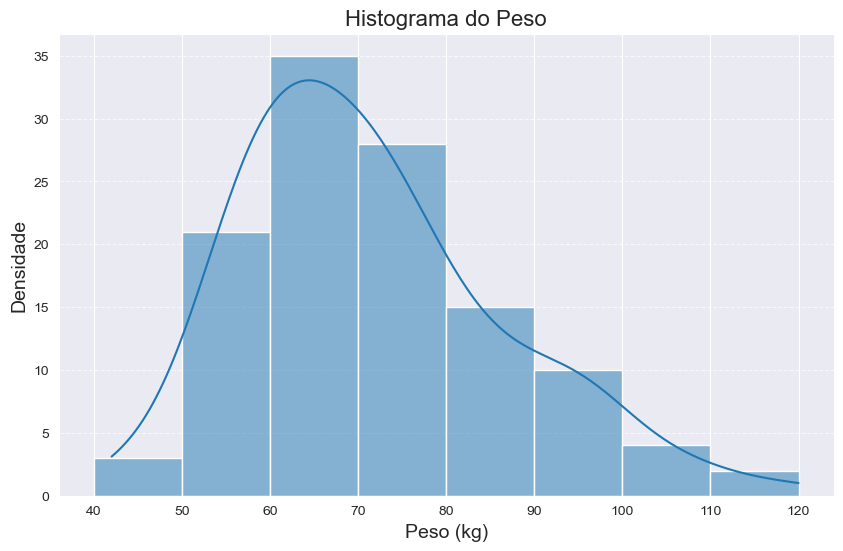

In [129]:
# Criar histograma para a variável "Peso"
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(dados['Peso'], bins=bins_peso, kde=True)

# Adicionar título e rótulos
plt.title('Histograma do Peso', fontsize=16)
plt.xlabel('Peso (kg)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### IMC
Tratamento: O IMC foi calculado a partir da altura e do peso, utilizando a formula IMC = peso / (altura * altura). O resultado foi arredondado para duas casas decimais.

#### Construcao da variavel

In [132]:
dados['IMC'] = (dados['Peso'] / ((dados['Altura'] / 100) ** 2)).round(2)
dados['IMC'].describe()

count    118.000000
mean      23.660678
std        4.522529
min       15.620000
25%       20.630000
50%       22.700000
75%       25.480000
max       37.870000
Name: IMC, dtype: float64

#### Descrição da variavel

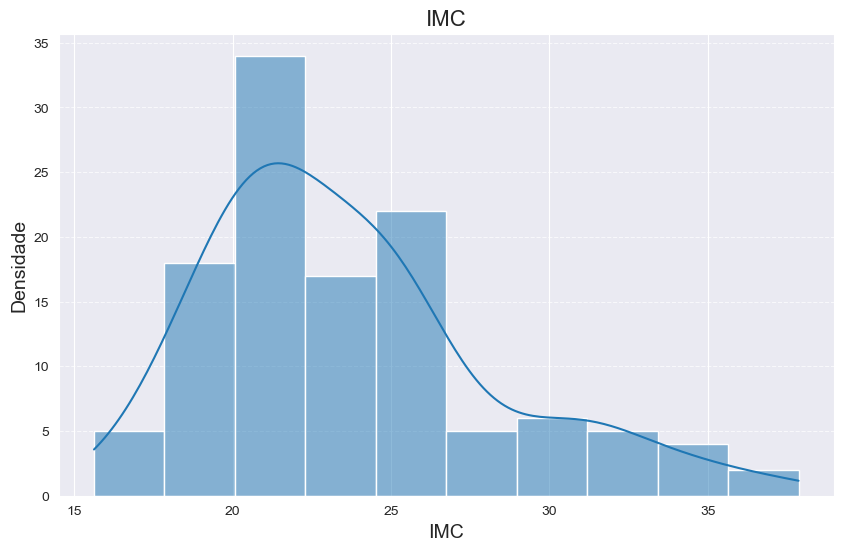

In [135]:
# Criar histograma para a variável "IMC"
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(dados['IMC'], bins=10, kde=True)

# Adicionar título e rótulos
plt.title('IMC', fontsize=16)
plt.xlabel('IMC', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Coeficiente de Bowley mostra ligeiro skweness ( assimetria) positivo do dado:



In [138]:
# Calcular os quartis
Q1 = dados['IMC'].quantile(0.25)
Q2 = dados['IMC'].quantile(0.50)
Q3 = dados['IMC'].quantile(0.75)

# Calcular o coeficiente de Bowley
skewness_bowley = (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)
print(f"Coef Bowley: {float(skewness_bowley):.3f}")

Coef Bowley: 0.146


#### Interpretação do IMC (faixas de referência)
- Abaixo do peso: IMC < 18.5
- Peso normal: 18.5 <= IMC < 24.9
- Sobrepeso: 25 <= IMC < 29.9
- Obesidade grau 1: 30 <= IMC < 34.9
- Obesidade grau 2: 35 <= IMC < 39.9
- Obesidade grau 3: IMC >= 40


In [141]:
# Categorizar os valores de IMC com base nas faixas de referência
faixas_imc = ['Abaixo do peso', 'Peso normal', 'Sobrepeso', 'Obesidade grau 1', 'Obesidade grau 2', 'Obesidade grau 3']
bins_imc = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
dados['Faixa_IMC'] = pd.cut(dados['IMC'], bins=bins_imc, labels=faixas_imc, right=False)
dados['Faixa_IMC'].cat.set_categories(faixas_imc, ordered=True)
freq_faixa_imc = dados['Faixa_IMC'].value_counts().reindex(faixas_imc)
freq_faixa_imc.to_frame("Frequência")

,Frequência
Faixa_IMC,
Abaixo do peso,9
Peso normal,69
Sobrepeso,25
Obesidade grau 1,12
Obesidade grau 2,3
Obesidade grau 3,0


Os dados abaixo retirei de : 
https://sbcbm.org.br/obesidade-atinge-mais-de-67-milhoes-de-pessoas-no-brasil-em-2022/
Mas a fonte e FONTE: SISTEMA DE ViGiLÂNCiA ALIMENTAR E NUTRICIONAL - SiSVAN I MINISTÉRIO DA SAÚDE

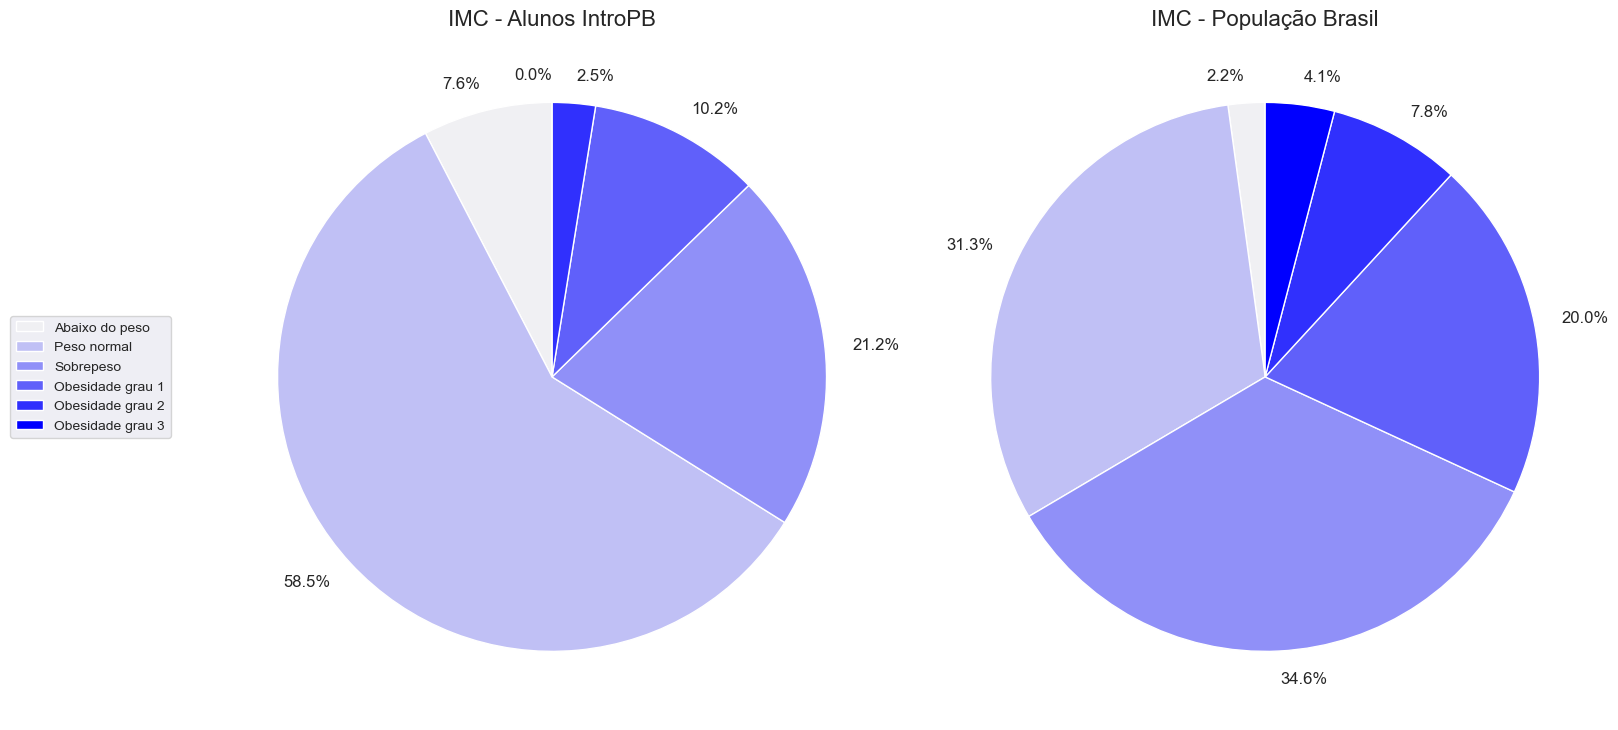

In [144]:
# Tabela com dado de referência
comparativo_imc = freq_faixa_imc.to_frame(name='Alunos_IntroPB')
comparativo_imc['Alunos_IntroPB'] = comparativo_imc['Alunos_IntroPB'] / comparativo_imc['Alunos_IntroPB'].sum()
DATABRL = [0.0217, 0.3132, 0.3463, 0.2004, 0.0777, 0.0407]
assert sum(DATABRL) == 1    
comparativo_imc["Populacao_Brasil"] = DATABRL
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico da esquerda: Alunos_IntroPB
axes[0].pie(
    comparativo_imc['Alunos_IntroPB'],
    labels=[f"{value * 100:.1f}%" for value in comparativo_imc['Alunos_IntroPB']],
    startangle=90,
    colors=sns.color_palette("light:b"),
    # autopct='%1.1f%%',
    textprops={'fontsize': 12}
)
axes[0].set_title('IMC - Alunos IntroPB', fontsize=16)
axes[0].legend(labels=comparativo_imc.index, loc='center left', bbox_to_anchor=(-0.3, 0.5))

# Gráfico da direita: Populacao_Brasil
axes[1].pie(
    comparativo_imc['Populacao_Brasil'],
    labels=[f"{value * 100:.1f}%" for value in comparativo_imc['Populacao_Brasil']],
    startangle=90,
    colors=sns.color_palette("light:b"),
    # autopct='%1.1f%%',
    textprops={'fontsize': 12}
)
axes[1].set_title('IMC - População Brasil', fontsize=16)
# axes[1].legend(labels=comparativo_imc.index, loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

In [146]:
comparativo_imc

,Alunos_IntroPB,Populacao_Brasil
Faixa_IMC,,
Abaixo do peso,0.076271,0.0217
Peso normal,0.584746,0.3132
Sobrepeso,0.211864,0.3463
Obesidade grau 1,0.101695,0.2004
Obesidade grau 2,0.025424,0.0777
Obesidade grau 3,0.000000,0.0407


#### IMC vs. valores esperados por uma normal

A conclusão é que a turma desvia um pouco da distribuição normal,especialmente nos extremos, onde a turma apresenta tails mais longos. Isso pode ser resultado de que a amostra da turma e pequena, ou não é representativa da população brasileir (oque faz muito sentido.)

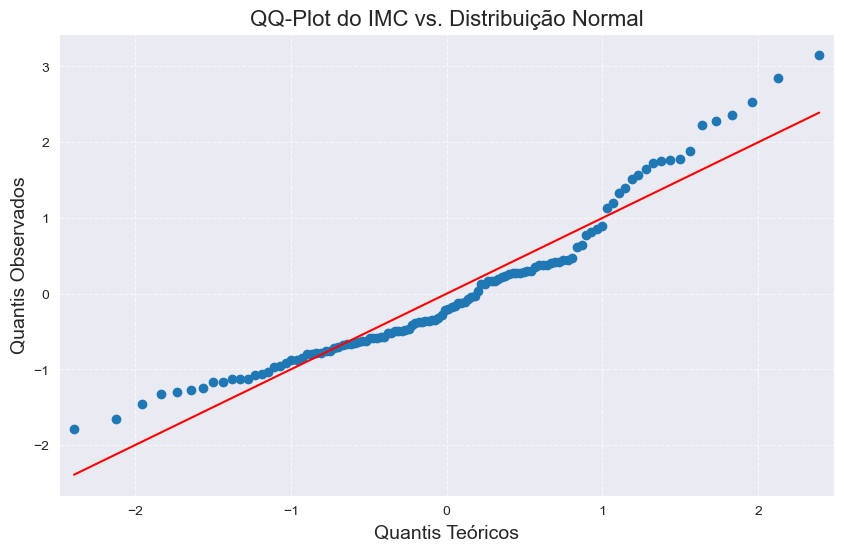

In [149]:
plt.figure(figsize=(10, 6))
qqplot(dados['IMC'], line='s', ax=plt.gca(),  fit=True)
plt.title('QQ-Plot do IMC vs. Distribuição Normal', fontsize=16)
plt.xlabel('Quantis Teóricos', fontsize=14)
plt.ylabel('Quantis Observados', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

@ Se der tempo (e encontrarmos o dado na internet), para o relatorio, seria interesente fazer um QQPlot comparando a distribuicao do IMC da classe com o o IMC da populacao brasileira. Tenho impressao que estamos mais no shape do que media da populacao.


## Notas para a parte C

Até aqui cumprimos com quase todos os topicos do livro do capitulo 1: 
 - tabelas de frequencia
 - graficos de barra (desidade vs. frequencia)
 - histogramas
 - grafico setor
 - qq plot

A parte C deveria apresentar pelo menos:
 - box-plot (na comparacao da distribuica do IMC aberto por varivel categorica)
 - grafico de dispersao (IMC vs. variavel continua "Indice de saudabilidade) (se formos criar e usar caso o resultdo nao fique bom...)
 


In [157]:
# Método 1: Usando value_counts() sem ordenação automática
faixa_imc_counts = dados['Faixa_IMC'].value_counts(sort=False)
print("Contagem por faixa de IMC:")
print(faixa_imc_counts)

# Método 2: Usando groupby() e size() para obter um DataFrame com a contagem
faixa_imc_counts_df = dados.groupby('Faixa_IMC').size().reset_index(name='Contagem')
print("\nContagem por faixa de IMC (DataFrame):")
print(faixa_imc_counts_df)


Contagem por faixa de IMC:
Faixa_IMC
Abaixo do peso       9
Peso normal         69
Sobrepeso           25
Obesidade grau 1    12
Obesidade grau 2     3
Obesidade grau 3     0
Name: count, dtype: int64

Contagem por faixa de IMC (DataFrame):
          Faixa_IMC  Contagem
0    Abaixo do peso         9
1       Peso normal        69
2         Sobrepeso        25
3  Obesidade grau 1        12
4  Obesidade grau 2         3
5  Obesidade grau 3         0


C:\Users\Leandro\AppData\Local\Temp\ipykernel_11560\3611158497.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Criando faixas para Tempo_sono

como os valores unicos são : [6 9 8 5 7 4]

Valores menores que 6 serão classificados como Baixo

Valores maiores ou iguais a 6 e menores que 8 serão Médio

Valores maiores ou iguais a 8 serão Alto


## Criando faixas para Tempo_tela
como os valores unicos são : [ 3  2  8  6 10  4  7 11  5 12  0 13  9 17 16  1]

Intervalo de 0 a 6 (exclusivo do 6) recebe o rótulo 'Baixo';

Intervalo de 6 a 8 recebe o rótulo 'Médio';

Intervalo de 8 a 12 recebe o rótulo 'Alto'.



In [159]:

# Cria uma cópia do DataFrame original
dados_binned = dados.copy()

# Criar a faixa de Tempo_tela com 3 intervalos
dados_binned['faixa_tela'] = pd.cut(
    dados_binned['Tempo_tela'],
    bins=[0, 6, 12, 18],
    labels=['Baixo', 'Médio', 'Alto'],
    right=False
)

# Criar a faixa de Tempo_sono com 3 intervalos
dados_binned['faixa_sono'] = pd.cut(
    dados_binned['Tempo_sono'],
    bins=[0, 6, 8, 12],
    labels=['Baixo', 'Médio', 'Alto'],
    right=False
)

# Exibe as primeiras linhas para verificação, mostrando as colunas originais e as novas faixas
print(dados_binned[['Tempo_tela', 'faixa_tela', 'Tempo_sono', 'faixa_sono']].head())


       Tempo_tela faixa_tela  Tempo_sono faixa_sono
Ident                                              
1               3      Baixo           6      Médio
2               2      Baixo           6      Médio
3               8      Médio           6      Médio
4               6      Médio           9       Alto
5               8      Médio           8       Alto


C:\Users\Leandro\AppData\Local\Temp\ipykernel_11560\1372049389.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Leandro\AppData\Local\Temp\ipykernel_11560\1372049389.py:20: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



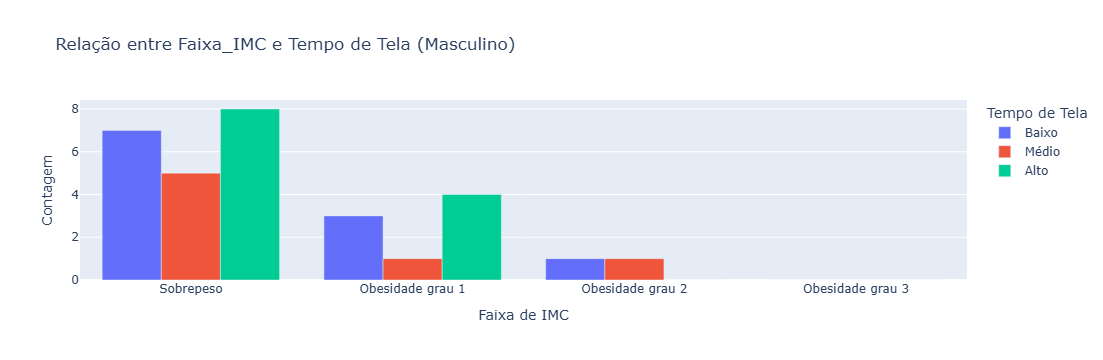

C:\Users\Leandro\AppData\Local\Temp\ipykernel_11560\1372049389.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Leandro\AppData\Local\Temp\ipykernel_11560\1372049389.py:20: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



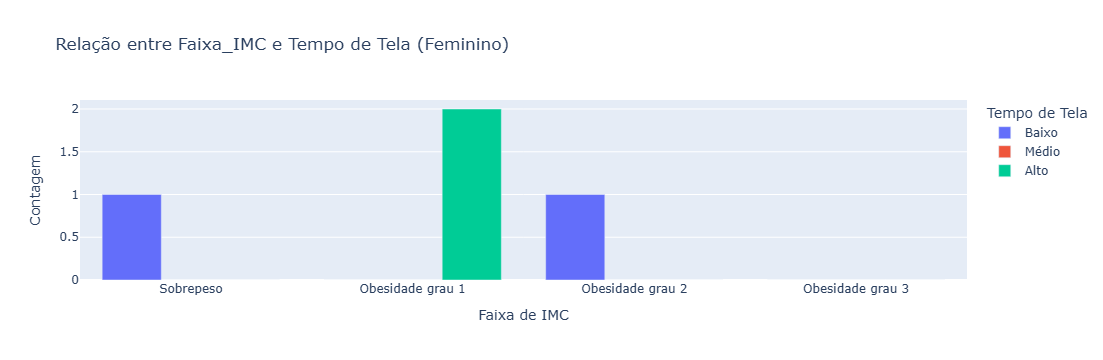

In [169]:
# 1. Cópia dos dados
df_tela = dados.copy()

# 2. Garantir a ordenação correta de Faixa_IMC
df_tela['Faixa_IMC'] = pd.Categorical(
    df_tela['Faixa_IMC'],
    categories=desired_imc_order,
    ordered=True
)

# 3. Para cada categoria de Sexo, agrupa, faz o binning e plota
for sexo_cat in ['Masculino', 'Feminino']:
    # Filtra o DataFrame usando 'Sexo' com S maiúsculo
    df_sex = df_tela[df_tela['Sexo'] == sexo_cat]
    
    # Agrupamento + binning on the fly
    pivot = (
        df_sex
        .groupby('Faixa_IMC')
        .apply(lambda x: pd.cut(
            x['Tempo_tela'],
            bins=[0, 6, 8, 12],
            labels=['Baixo','Médio','Alto'],
            right=False
        ).value_counts())
        .unstack(fill_value=0)
    )
    # Reindex para manter a ordem desejada e colunas fixas
    pivot = pivot.reindex(desired_imc_order, fill_value=0)[['Baixo','Médio','Alto']]

    # Monta o gráfico de barras em grupo
    fig = go.Figure()
    for cat in ['Baixo','Médio','Alto']:
        fig.add_trace(go.Bar(
            x=pivot.index.astype(str),
            y=pivot[cat],
            name=cat
        ))

    fig.update_layout(
        barmode='group',
        title=f"Relação entre Faixa_IMC e Tempo de Tela ({sexo_cat})",
        xaxis_title="Faixa de IMC",
        yaxis_title="Contagem",
        legend_title="Tempo de Tela"
    )
    fig.show()

C:\Users\Leandro\AppData\Local\Temp\ipykernel_11560\3951951992.py:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Leandro\AppData\Local\Temp\ipykernel_11560\3951951992.py:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



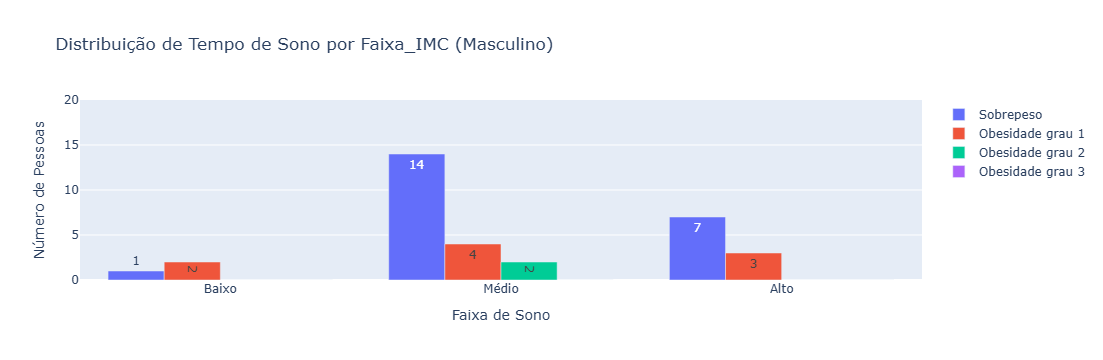

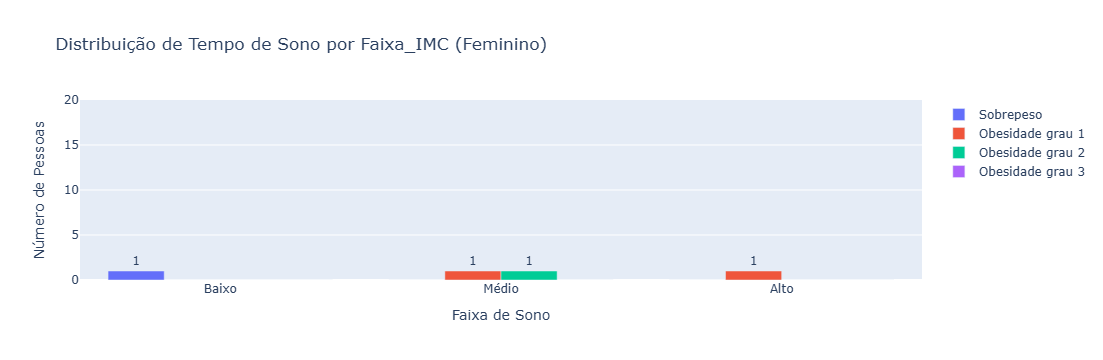

In [193]:
# --- Preparação dos Dados ---
df_sono = dados.copy()
desired_imc_order = [
    "Sobrepeso",
    "Obesidade grau 1",
    "Obesidade grau 2",
    "Obesidade grau 3"
]
df_sono['Faixa_IMC'] = pd.Categorical(
    df_sono['Faixa_IMC'],
    categories=desired_imc_order,
    ordered=True
)

sono_bins   = [0, 6, 8, 12]
sono_labels = ['Baixo', 'Médio', 'Alto']

# --- Geração das pivot tables e cálculo do máximo global para y-axis ---
pivot_tables = {}
max_count = 0

for sexo_cat in ['Masculino', 'Feminino']:
    df_sex = df_sono[df_sono['Sexo'] == sexo_cat]
    pivot = (
        df_sex
        .groupby('Faixa_IMC')['Tempo_sono']
        .apply(lambda x: pd.cut(
            x, bins=sono_bins, labels=sono_labels, right=False
        ).value_counts())
        .unstack(fill_value=0)
        .reindex(index=desired_imc_order, columns=sono_labels, fill_value=0)
    )
    pivot_tables[sexo_cat] = pivot
    max_count = max(max_count, pivot.values.max())

# --- Plotagem para cada sexo, sem linhas de tendência ---
for sexo_cat, pivot in pivot_tables.items():
    fig = go.Figure()

    # Barras com rótulos de contagem
    for imc_cat in desired_imc_order:
        counts = pivot.loc[imc_cat].values
        fig.add_trace(go.Bar(
            x=sono_labels,
            y=counts,
            name=imc_cat,
            text=counts,
            textposition='auto'
        ))

    fig.update_layout(
        barmode='group',
        title=f"Distribuição de Tempo de Sono por Faixa_IMC ({sexo_cat})",
        xaxis_title="Faixa de Sono",
        yaxis_title="Número de Pessoas",
        yaxis=dict(range=[0, max(20, max_count)])
    )

    fig.show()


Contagem por faixa de sono e tela — Masculino:
faixa_tela  Baixo  Médio  Alto
faixa_sono                    
Baixo           2      4     0
Médio          18     35     6
Alto           13     14     1


C:\Users\Leandro\AppData\Local\Temp\ipykernel_11560\1798906271.py:33: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



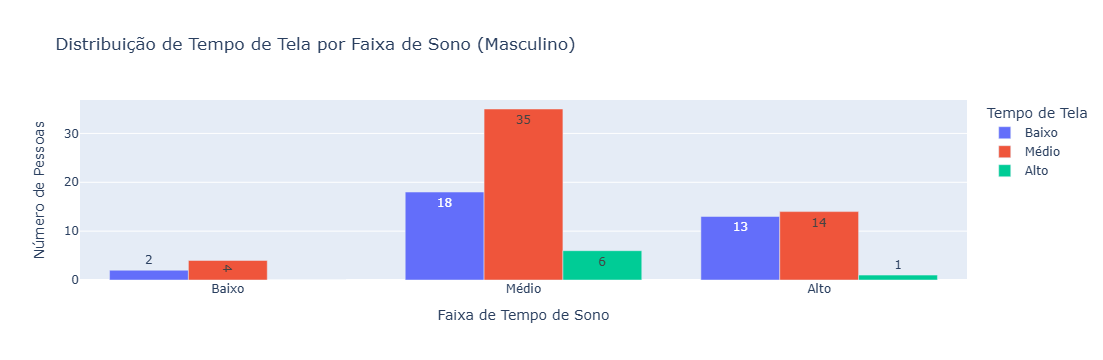


Contagem por faixa de sono e tela — Feminino:
faixa_tela  Baixo  Médio  Alto
faixa_sono                    
Baixo           1      0     0
Médio           7      4     1
Alto            4      3     1


C:\Users\Leandro\AppData\Local\Temp\ipykernel_11560\1798906271.py:33: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



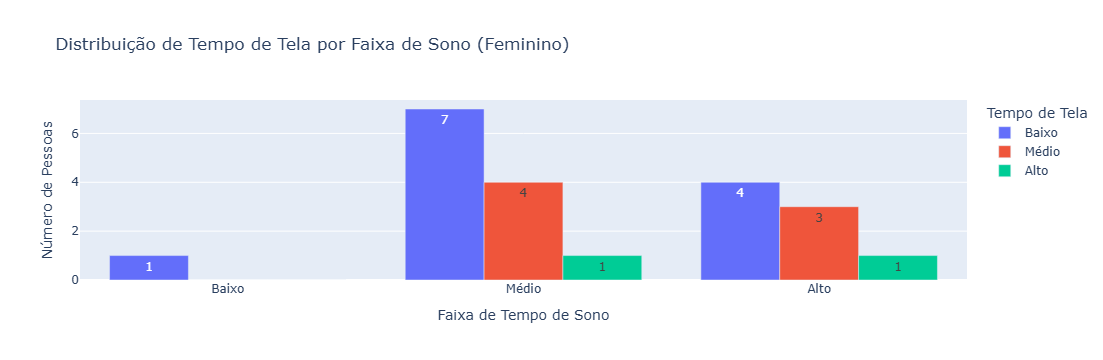

In [191]:
# --- Binning definitions ---
sleep_bins = [0, 6, 8, 12]
sleep_labels = ['Baixo', 'Médio', 'Alto']
screen_bins = [0, 6, 12, 18]
screen_labels = ['Baixo', 'Médio', 'Alto']

# --- Fixed orders for consistent plotting ---
sleep_order = sleep_labels
screen_order = screen_labels

# --- Loop por cada Sexo ---
for sexo_cat in ['Masculino', 'Feminino']:
    # 1. Filtra apenas aquele sexo
    df_sexo = dados[dados['Sexo'] == sexo_cat].copy()
    
    # 2. Aplica o binning "on the fly"
    df_sexo['faixa_sono'] = pd.cut(
        df_sexo['Tempo_sono'],
        bins=sleep_bins,
        labels=sleep_labels,
        right=False
    )
    df_sexo['faixa_tela'] = pd.cut(
        df_sexo['Tempo_tela'],
        bins=screen_bins,
        labels=screen_labels,
        right=False
    )
    
    # 3. Pivot table: contagem de faixa_tela por faixa_sono
    pivot = (
        df_sexo
        .groupby('faixa_sono')['faixa_tela']
        .value_counts()
        .unstack(fill_value=0)
        .reindex(index=sleep_order, columns=screen_order, fill_value=0)
    )
    
    print(f"\nContagem por faixa de sono e tela — {sexo_cat}:")
    print(pivot)
    
    # 4. Gráfico de barras agrupadas com rótulos
    fig = go.Figure()
    for screen_cat in screen_order:
        counts = pivot[screen_cat]
        fig.add_trace(go.Bar(
            x=pivot.index.astype(str),
            y=counts,
            name=screen_cat,
            text=counts,
            textposition='auto'
        ))
    
    fig.update_layout(
        barmode='group',
        title=f"Distribuição de Tempo de Tela por Faixa de Sono ({sexo_cat})",
        xaxis_title="Faixa de Tempo de Sono",
        yaxis_title="Número de Pessoas",
        legend_title="Tempo de Tela"
    )
    fig.show()

## Boxplot:
##Utilizamos o Plotly Express (px.box) para criar um boxplot em que o eixo x representa as categorias de “Alimentação” e o y mostra os valores de IMC. Assim, é possível comparar visualmente a dispersão do IMC em cada grupo.

## Índice de Saudabilidade:
##Como a variável “Alimentação” é qualitativa, criamos um mapeamento para convertê-la em uma variável numérica. Quanto melhor a alimentação, maior o índice atribuído (por exemplo, “Muito saudável” → 4).

## Gráfico de Dispersão:
##Com o px.scatter relacionamos a variável contínua “Indice_saudabilidade” com o IMC. Assim, é possível verificar se existe alguma tendência, por exemplo, se um índice mais alto (alimentação melhor) está associado a um IMC menor ou maior.

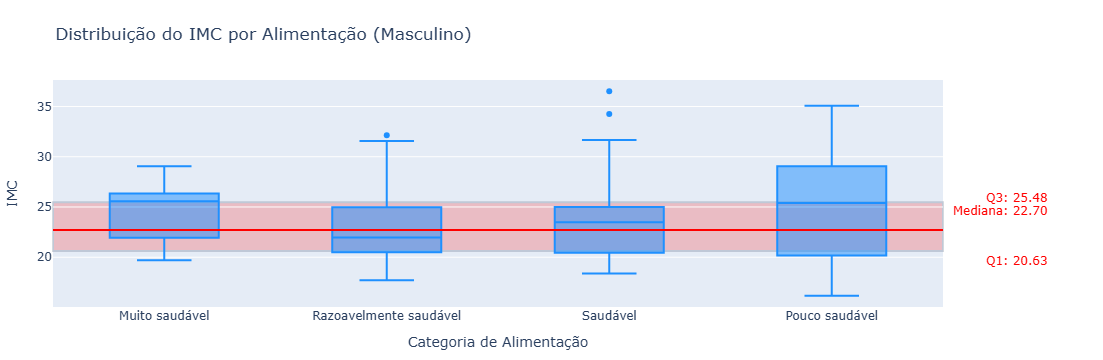

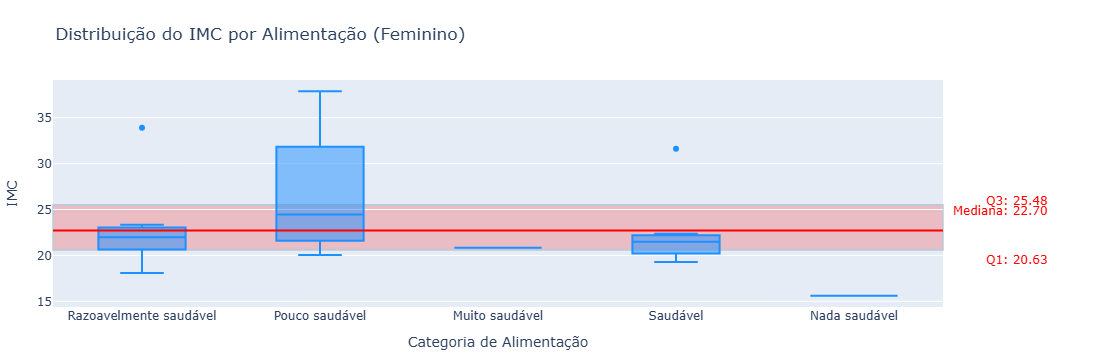

In [203]:
# --- 0. Preparação dos dados ---
dados_binned = dados.copy()
dados_binned['IMC'] = dados_binned['Peso'] / ((dados_binned['Altura'] / 100) ** 2)

# Quartis globais de IMC
q1     = dados_binned['IMC'].quantile(0.25)
median = dados_binned['IMC'].quantile(0.5)
q3     = dados_binned['IMC'].quantile(0.75)

# --- 1. Loop por Sexo ---
for sexo_cat in ['Masculino', 'Feminino']:
    df_sex = dados_binned[dados_binned['Sexo'] == sexo_cat]

    # 2. Boxplot
    fig = px.box(
        df_sex,
        x="Alimentação",
        y="IMC",
        title=f"Distribuição do IMC por Alimentação ({sexo_cat})",
        labels={"Alimentação": "Categoria de Alimentação", "IMC": "IMC"},
        color_discrete_sequence=["dodgerblue"]
    )

    # 3. Retângulo Q1–Q3 e linha da mediana
    fig.add_shape(
        type="rect",
        xref="paper", yref="y",
        x0=0,   x1=1,
        y0=q1,  y1=q3,
        fillcolor="red",
        opacity=0.2,
        layer="below"
    )
    fig.add_shape(
        type="line",
        xref="paper", yref="y",
        x0=0,   x1=1,
        y0=median, y1=median,
        line=dict(color="red", width=2)
    )

    # 4. Anotações dos quartis — mais afastadas para legibilidade
    right_x = 1.12  # deslocamento maior
    fig.add_annotation(
        x=right_x, y=q1,
        xref="paper", yref="y",
        text=f"Q1: {q1:.2f}",
        showarrow=False,
        font=dict(color="red", size=12),
        yshift=-10
    )
    fig.add_annotation(
        x=right_x, y=median,
        xref="paper", yref="y",
        text=f"Mediana: {median:.2f}",
        showarrow=False,
        font=dict(color="red", size=12),
        yshift=20
    )
    fig.add_annotation(
        x=right_x, y=q3,
        xref="paper", yref="y",
        text=f"Q3: {q3:.2f}",
        showarrow=False,
        font=dict(color="red", size=12),
        yshift=5
    )

    # 5. Layout: margem maior para anotações + fixa ticks no eixo y
    fig.update_layout(
        margin=dict(l=40, r=160, t=80, b=40),
        xaxis_title="Categoria de Alimentação",
        yaxis_title="IMC",
        yaxis=dict(fixedrange=True)  # impede zoom que altere eixo
    )

    fig.show()

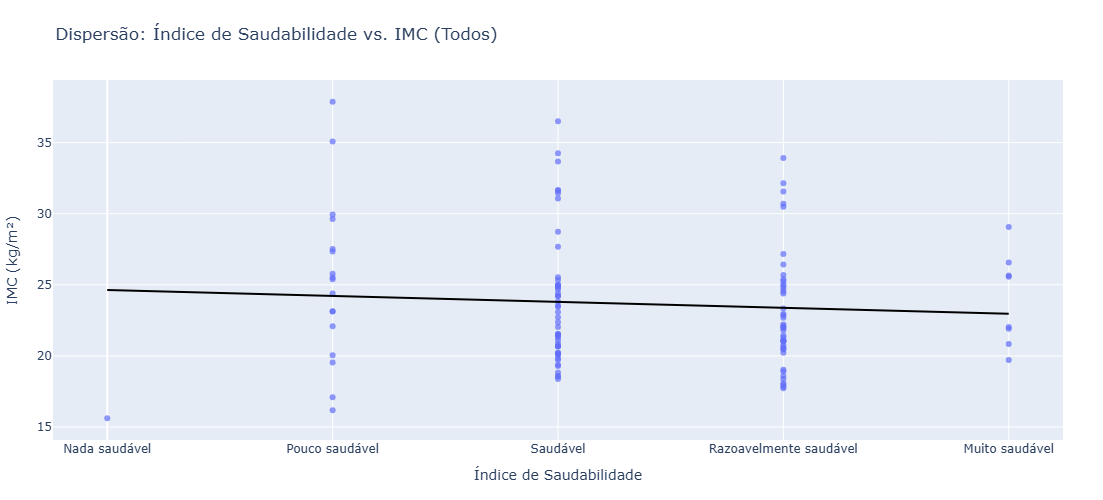

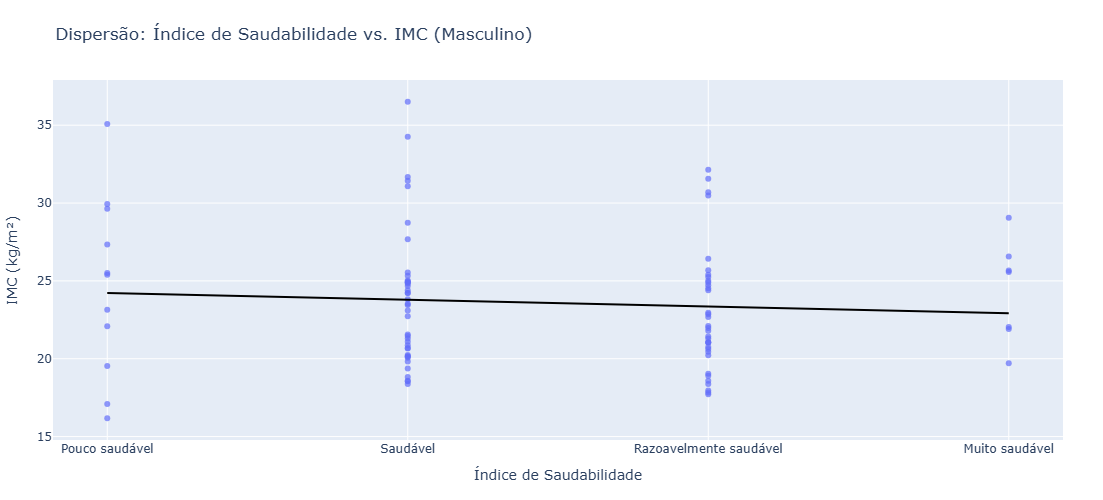

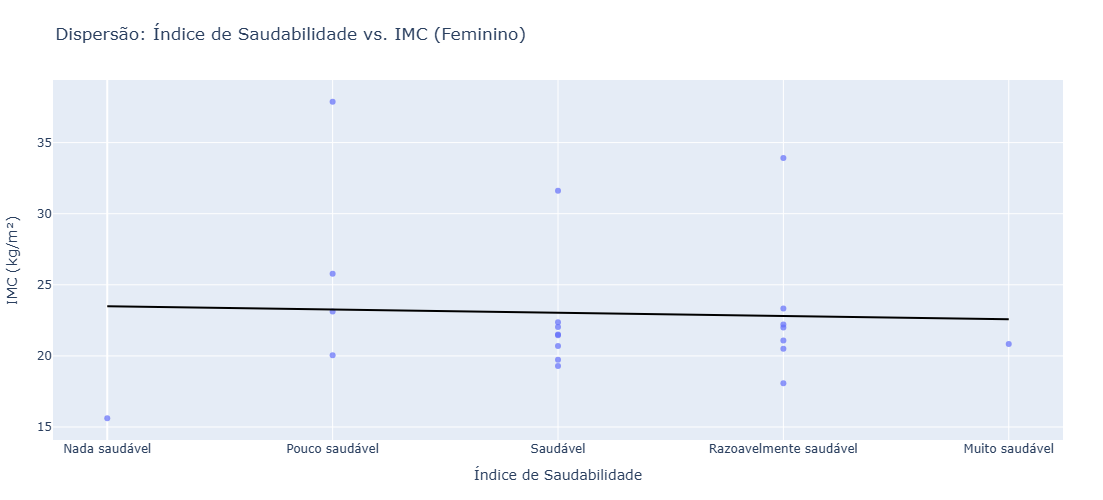

In [229]:
# --- 0. Preparação dos dados ---
dados_binned = dados.copy()
dados_binned['IMC'] = dados_binned['Peso'] / ((dados_binned['Altura'] / 100) ** 2)
mapping = {
    "Nada saudável": 0,
    "Pouco saudável": 1,
    "Saudável": 2,
    "Razoavelmente saudável": 3,
    "Muito saudável": 4
}
reverse_mapping = {v:k for k,v in mapping.items()}
dados_binned['Indice_saudabilidade'] = dados_binned['Alimentação'].map(mapping)
# garante tipo numérico
dados_binned['Indice_saudabilidade'] = pd.to_numeric(dados_binned['Indice_saudabilidade'], errors='coerce')
dados_binned['IMC']               = pd.to_numeric(dados_binned['IMC'], errors='coerce')

# --- 1. Define os grupos que vão virar cada gráfico ---
grupos = {
    "Todos": dados_binned,
    "Masculino": dados_binned[dados_binned['Sexo']=="Masculino"],
    "Feminino": dados_binned[dados_binned['Sexo']=="Feminino"]
}

# --- 2. Cria 3 gráficos, um abaixo do outro ---
for nome, df in grupos.items():
    fig = px.scatter(
        df,
        x="Indice_saudabilidade",
        y="IMC",
        trendline="ols",
        trendline_color_override="black",
        title=f"Dispersão: Índice de Saudabilidade vs. IMC ({nome})",
        labels={
            "Indice_saudabilidade": "Índice de Saudabilidade",
            "IMC": "IMC (kg/m²)"
        },
        width=800,
        height=500
    )
    # marcadores menores e sem legenda redundante
    fig.update_traces(marker=dict(size=6, opacity=0.7), selector=dict(mode="markers"))
    fig.update_layout(showlegend=False,
                      margin=dict(t=80, b=60, l=40, r=40))

    # traduz ticks numéricos de saudabilidade de volta ao texto
    tick_vals = sorted(reverse_mapping)
    tick_text = [reverse_mapping[v] for v in tick_vals]
    fig.update_xaxes(tickmode="array", tickvals=tick_vals, ticktext=tick_text)

    # exibe cada figura (em Jupyter elas aparecerão empilhadas)
    fig.show()